## CS 6120: Natural Language Processing - Prof. Ahmad Uzair

### Assignment 2: Text Classification and Neural Network
### Total Points: 100 points

In Assignment 2, you will be dealing with text classification using Multinomial Naive Bayes and Neural Networks. You will also be dealing with vector visualization. In the previous assingment you implemented Bag of Words as the feature selection method. However, in this assignment you will be using TF-IDF Vectorization instead of Bag of Words. We recommend starting with this assignment a little early as the datasets are quite large and several parts of the assignment might take long duration to execute. 

## Question 1 Text Classification

In the first question you will be dealing with 20 News Group Dataset. You are required to implement TF-IDF vectorization from scratch and perform Multinomial Naive Bayes Classification on the News Group Dataset.
You may use appropriate packages or modules for fitting the Multinomial Naive Bayes Model, however, the implementation of the TF-IDF Vectorization should be from the scratch.

The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon a messages posted before and after a specific date.

Link to the original dataset: http://archive.ics.uci.edu/ml/datasets/Twenty+Newsgroups

You can also import the dataset from sklearn.datasets

In [8]:
#importing the libraries

import numpy as np
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from pprint import pprint
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
import pandas as pd
import re
import numpy as np
from nltk.tokenize import  word_tokenize 
import nltk
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics


In [2]:
# Import the 20 news group dataset utilizing sklearn library
from sklearn.datasets import fetch_20newsgroups
mydata_train = fetch_20newsgroups(subset='train')

mydata_test = fetch_20newsgroups(subset='test')


In [3]:
# Print the news groups(target) in the dataset

pprint(list(mydata_train.target_names))

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


In [4]:
# What is the type of 'mydata_train' and 'mydata_test'

print(type(mydata_train))
print(type(mydata_test))

<class 'sklearn.utils.Bunch'>
<class 'sklearn.utils.Bunch'>


In [5]:
# Check the length of the data

print(len(mydata_train.data))
print(len(mydata_train.filenames))
print(len(mydata_test.data))
print(len(mydata_test.filenames))

11314
11314
7532
7532


### Expected Output: 
11314

11314

7532

7532

## Extracting Features from the Dataset                        (20 Points)

In order to perform machine learning on text documents, we first need to turn the text content into numerical feature vectors.

### TF-IDF Vectorization

Our model cannot simply read the text data so we convert it into numerical format. In order to convert the data into numerical format we create vectors from text.

For this particular purpose we could either employ Bag of Words or TF-IDF Vectorization

Bag of Words just creates a set of vectors containing the count of word occurrences in the document (reviews), while the TF-IDF model contains information on the more important words and the less important ones as well.

TF-IDF stands for Term Frequency-Inverse Document Frequency, which instead of giving more weight to words that occur more frequently, it gives a higher weight to words that occur less frequently.

Ref:https://www.analyticsvidhya.com/blog/2020/02/quick-introduction-bag-of-words-bow-tf-idf/#:~:text=Bag%20of%20Words%20just%20creates,less%20important%20ones%20as%20well.

TF-IDF = Term Frequency (TF) * Inverse Document Frequency (IDF)

Term Frequency is the measure of the frequency of words in a document. It is the ratio of the number of times the word appears in a document compared to the total number of words in that document.

The words that occur rarely in the corpus have a high IDF score. It is the log of the ratio of the number of documents to the number of documents containing the word.

idf(t) = log(N/(df + 1))

In [6]:
text = mydata_train.data
test = mydata_test.data

## Preprocessing the Corpus

In [7]:
# Preprocessing the data

lines = [] 
word_list = [] 

for line in text[:]:
    x = [i.lower() for  i in word_tokenize(line) if i.isalpha()]#for reduce size of tfidf matrix, I only choose words which only have alphabet letters (a-z), and change uppercase to lowercase 
    lines.append(x)#lines store tokens from line
    for word in x:
        if word not in word_list:#add word into word_list if this word is not in word_list
            word_list.append(word)
    #tokenize the text documents and update the lists word_list and lines
 

 # Make sure the word_list contains unique tokens
word_list = set(word_list)
 
# Calculate the total documents present in the corpus
total_docs = len(lines)
 
#Create a dictionary to keep track of index of each word
dict_idx = {}
i = 0
for word in word_list:#the word_list contains unique tokens，the index of word_list are made as value in dict_idx, and words are made as key
    dict_idx[word] = i
    i += 1

In [8]:
# Create a frequency dictionary
 
def frequency_dict(lines):
    '''
    lines: list containing all the tokens
    ---
    freq_word: returns a dictionary which keeps the count of the number of documents containing the given word
    '''
    freq_word = {}# set dict
    for w in word_list:#if word is in word_list, we creat key and value for this word
        freq_word[w] = 0# initial value is 0
        for line in lines:
            if w in line:
                freq_word[w] += 1   #if this word in this line, add 1   
    
    return freq_word

In [9]:
# Create a dictionary containing the frequency of words utilizing the 'frequency_dict' function

# Expect this chunk to take a comparatively longer time to execute since our dataset is large

freq_word = frequency_dict(lines)

freq_word

{'scolding': 2,
 'bat': 60,
 'telecommuting': 2,
 'meritt': 16,
 'tcpdump': 1,
 'flink': 2,
 'wasington': 1,
 'camino': 4,
 'pseudo': 5,
 'kingship': 2,
 'chunk': 14,
 'waite': 2,
 'xtranslatecoordinates': 1,
 'immeadiately': 1,
 'ckctpa': 1,
 'hoang': 2,
 'kmak': 1,
 'employee': 35,
 'wawers': 1,
 'hondo': 2,
 'allen': 127,
 'enjoyment': 11,
 'punishments': 13,
 'batkaj': 1,
 'chars': 8,
 'prl': 1,
 'ntutaiwan': 1,
 'photoreceptors': 1,
 'billq': 8,
 'tuchuses': 1,
 'odom': 2,
 'heatofmoment': 1,
 'carpeting': 4,
 'posner': 1,
 'luminosity': 2,
 'undeniably': 3,
 'salvage': 6,
 'conic': 1,
 'hadith': 6,
 'wrong': 802,
 'jerome': 7,
 'chiche': 1,
 'vynal': 3,
 'aniversary': 1,
 'oberon': 1,
 'caprices': 2,
 'stubbs': 1,
 'charming': 3,
 'swanlake': 3,
 'perceived': 26,
 'firsthand': 3,
 'dsr': 2,
 'babble': 4,
 'cpr': 67,
 'iqz': 1,
 'astrological': 1,
 'asst': 6,
 'ins': 9,
 'spin': 33,
 'sirius': 1,
 'cowles': 1,
 'compu': 3,
 'gks': 7,
 'annul': 1,
 'historical': 128,
 'titusville':

In [10]:
# Create a function to calculate the Term Frequency

def term_frequency(document, word):
    '''
    document: list containing the entire corpus
    word: word whose term frequency is to be calculated
    ---
    tf: returns term frequency value
    '''
    n = len(document)# get length of this document
    o = len([token for token in document if token == word])#occurence of this word in this document
    tf = o/n#calculate tf
    return tf

In [11]:
# Create a function to calculate the Inverse Document Frequency
 
def inverse_df(word):
    '''
    word: word whose inverse document frequency is to be calculated
    ---
    idf: return inverse document frequency value
    '''
    if word in freq_word:#we should detect whether this word is in freq_word or not
        hehe = freq_word[word] + 1#if this word is in freq_word
    else:
        hehe = 1#if this word is not in freq_word
    idf = np.log(total_docs/hehe)#calculate idf
    return idf

In [12]:
#Create a function to combine the term frequencies (TF) and inverse document (IDF) frequencies calculated above to get TF-IDF

def tfidf(sentence,dict_idx):
    '''
    sentence: list containing the entire corpus
    dict: dictionary keeping track of index of each word
    ---
    tf_idf_vec: returns computed tf-idf
    '''
    tf_idf_vec = np.zeros((len(word_list),)) #create a array to store tfidf values
    for wo in sentence:
        tf = term_frequency(sentence,wo)# get tf
        idf = inverse_df(wo)#get idf
        value = tf*idf#calculate tfidf
        tf_idf_vec[dict_idx[wo]] = value#store tfidf into exact position
        #print(idf)
    return tf_idf_vec

In [13]:
import gc
gc.collect()#release memory for run successfully

80

In [14]:
#Compute the vectors utilizing the 'tfidf' function created above to obtain a TF-IDF Encoded text corpus
vectors = []#store tfidf
for line in lines:#for each line calculate tfidf
    v = tfidf(line,dict_idx)
    vectors.append(v)


In [15]:
from sklearn import preprocessing
#this part is to solve problem that MultinomialNB can not accept nagetive values
def min_max_normalization(np_array):
    min_max_scaler = preprocessing.MinMaxScaler()
    ret = min_max_scaler.fit_transform(np_array)
    return ret


In [16]:

gc.collect()#release memory for run successfully

60

## Multinomial Naive Bayes (10 Points)

In [17]:
ret = min_max_normalization(vectors)

In [18]:
del vectors#release memory for run successfully

In [19]:
#Fit a Multinomial Naive Bayes Model on our dataset
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(ret,mydata_train.filenames)

MultinomialNB()

In [20]:
gc.collect()#release memory for run successfully

80

In [21]:
#Perform testing on the train dataset

pred = model.predict(ret)

In [22]:
#Calculate the F1 Score and the Accuracy
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
F1_score = f1_score(mydata_train.filenames, pred, average='macro')
Accuracy = accuracy_score(mydata_train.filenames, pred)
print("F1 Score: ", F1_score)
print("Accuracy: ", Accuracy)

F1 Score:  0.9858199281126627
Accuracy:  0.9893052854870072


### Expected Output:
F1 Score: 0.9533633964397735

Accuracy: 0.9524482941488421

Your accuracy does not have to be exactly the same. This is just to give you an estimate of what could you expect your accuracy to be around.

## Question 2 Vector Visualization

In this unsupervised learning task we are going to cluster wikipedia articles into groups using T-SNE visualization after vectorization.

### Collect articles from Wikipedia (10 points)

In this section we will download articles from wikipedia and then vectorize them in the next step. You can select somewhat related topics or fetch the articles randomly. 
(Use dir() and help() functions or refer wikipedia documentation)
You may also pick any other data source of your choice instead of wikipedia.

In [16]:
pip install wikipedia

Note: you may need to restart the kernel to use updated packages.


In [17]:
import wikipedia
from wikipedia.exceptions import WikipediaException

'''
 Generate a list of wikipedia article to cluster 
 You can maintain a static list of titles or generate them randomly using wikipedia library
 Some topics include:
 ["Northeastern Unversity", "Natural language processing", "Machine learning", "Quantum machine learning", "Artificial intelligence", "Data science", "Master in Data Science", 
 "Bank of America", "Visa Inc.", "European Central Bank", "Bank", "Financial technology","International Monetary Fund", 
 "Basketball", "Swimming", "Tennis", "Football", "College Football", "Association Football"]

 You can add more topics from different categories so that we have a diverse dataset to work with. 
 Ex- About 3+ categories(groups), 3+ topics in each category, 3+ articles in each topic
'''

# selected topics
topics = ["Football","International Monetary Fund", "Quantum machine learning", "Artificial intelligence"]

# list of articles to be downloaded
articles = []
number_of_each_topic = []#calculate number of articles of each topics for plot T-sne result
for topic in topics:
    tempt = wikipedia.search(topic)#get title of articles of this topic
    number_of_each_topic.append(len(tempt))#store number of articles of each topics
    for a in tempt:
        articles.append(a)#store articles titles
        
    
# download and store articles (summaries) in this variable
data = []
for article in articles:
    data.append(wikipedia.summary(article))


### Cleaning the Data (5 points)
In this step you will decide whether to clean the data or not. If you choose to clean, you may utilize the clean function from assignment 1.

**Question:** Why are you (not) choosing to clean the data? Think in terms of whether cleaning data will help in the clustering or not.

**Answer(1-3 sentences):** Articles contains links, punctuation, stopwords and many other words that don't give a lot of meaning for the clustering model.It is also important to lowercase the letters so that 'Admire' and 'admire' are not treated as different words in the cluster model. This process can reduce the time and space required to run programs. In addition to this, perform stemming operation so that similar words are reduced. This step help model to do better cluster and improve performance of the cluster model.

In [18]:
# You can use Assignment 1's clean message function
import re
import nltk
import string
#nltk.download('punkt')
#nltk.download('stopwords')


import nltk
nltk.download('wordnet')
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
ps = nltk.PorterStemmer()#stemming

def toLowerCase(text):
    return text.lower() #changes all upper case alphabet to lower case
import string
string.punctuation # checking punctuations
def removePunctuation(text):
    return "".join([char for char in text if char not in string.punctuation])#removePunctuation

import re
def removeURLs(text):
    
    text = re.sub(r"http\S+", "", text) # replaces URLs starting with http 
    text = re.sub(r"www.\S+", "", text) # replaces URLs starting with wwe
    return text


from nltk.tokenize import sent_tokenize, word_tokenize# Use NLTK Pakecage to import sent_tokenize and word_tokenize
from nltk.corpus import stopwords# Use NLTK Pakecage to import stopwords
nltk.download('stopwords')
def clean_message(message):
    '''
    Input:
        review: a string containing a review.
    Output:
        review_cleaned: a processed review. 

    '''
    text1 = toLowerCase(message)#toLowerCase
    text2 = removeURLs(text1)#removeURLs
    text = removePunctuation(text2)#removePunctuation
    
    
    
    words = text.split()#split str 
    r = []#store final result
    for w in words:
        if w not in stopwords.words("english"):#select words which are not in stopword.word
            r.append(ps.stem(w))#stemming
    message=' '.join(r)#combine str
    


    return message

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\54364\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\54364\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
clean_data = []#clean data 
for message in data:
    cm = clean_message(message)
    clean_data.append(cm)
    
    

### Vectorize the articles (5 points)

In this step, we will vectorize the text data. You can use TfidfVectorizer() or countVectorizer() from sklearn library.

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clean_data)

In [21]:
print(X.shape)

(40, 1729)


### Sample Output:
(36, 1552)

### Plot Articles (10 points)
Now we will try to verify the groups of articles using T-SNE from sklearn library.

In [22]:
TFIDFresult = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())#transform sparse matrix into dataframe

In [23]:
import numpy as np
from sklearn.manifold import TSNE

# call TSNE() to fit the data
X_embedded = TSNE(n_components=2,
                     init='random').fit_transform(TFIDFresult)# choose two dimension

In [24]:
np.arange(1,len(X_embedded)+1,1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40])

Plot and annotate the points with different markers for different expected groups.

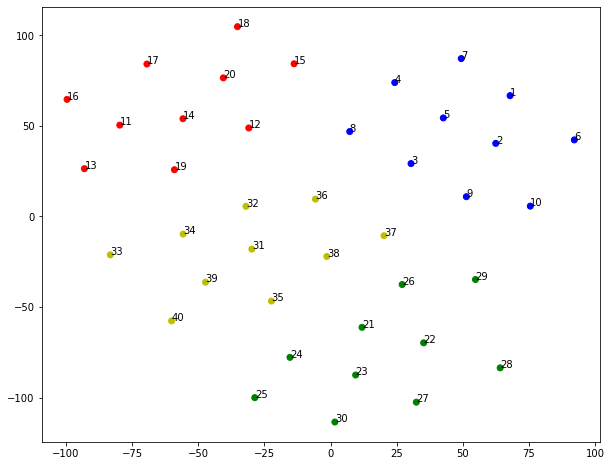

In [25]:
import matplotlib.pyplot as plt

# get a figure handle
fig,ax = plt.subplots(figsize=(10,8))
v = ['b','r','g','y']#set colour for each topic
colour = []
p = 0
#this for is to add colour for each topics' T_sne result
for num in number_of_each_topic:
    colour += v[p]*num
    p += 1
ax.scatter(X_embedded[0:,0],X_embedded[0:,1],c=colour)#use scatter to plot
n = np.arange(1,len(X_embedded)+1,1)
for i, txt in enumerate(n):#add number for each point
    ax.annotate(txt, (X_embedded[i,0], X_embedded[i,1]))
plt.show()   



**Question:** Comment about the categorizion done by T-SNE. Do the articles of related topics cluster together? (5 points)

**Answer(1-3 sentences):** I think I get a good result, each topic's T-sne result is in same area. The articles of related topics cluster together. But sometime result is not so good, some articles  of some related topics do not cluster together. You choose other topics and may get this reulst. I think this is because some topics similar with other topics, so the aritcles of these topics will culter with other topics. In addition,this is other possible reason. In fact, T-sne reduce data's dimension and cluster them in low dimension. In this question, I make these data become two dimension data, so maybe some articles of topics are close to other topics in this two dimension space and cluster with other topics.
  


# Question 3 Building Neural Networks

### We are gonna use Emotions Dataset for this task. We need to classify the given text into different kind of emotions like happy,sad,anger etc.., 

### We are providing train.txt and val.txt files along with this notebook. 

### Library Imports and Utility functions

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string
import pandas as pd
import re
#string.punctuation
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')

stopword = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
words = set(nltk.corpus.words.words())


def clean_text(text):
  # From the last assignment
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"www.\S+", "", text)
    text_links_removed = "".join([char for char in text if char not in string.punctuation])
    text_cleaned = " ".join([word for word in re.split('\W+', text_links_removed)
        if word not in stopword])
    text = " ".join([wn.lemmatize(word) for word in re.split('\W+', text_cleaned)])
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\54364\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\54364\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\54364\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


### Q) Importing the datasets and do the necessary cleaning and convert the text into the vectors which are mentioned in the below code blocks. (10 points)

In [2]:
# Import the train.txt and val.txt file into pandas dataframe format 
train_fd = pd.read_csv('train.txt', sep=";", header =None)
test_fd = pd.read_csv('test.txt', sep=";", header =None)
# train 
train =  train_fd
# validation
validation = test_fd
# and printout the train.shape and validation.shape 
print(train.shape)
print(validation.shape)
# expected shape of train dataset is (16000,2) and validation dataset is (2000,2)

(16000, 2)
(2000, 2)


In [3]:
# clean the text in the train and validation dataframes using the clean_text function provided above
for train_m in range(len(train)):
    train[0][train_m] = clean_text(train[0][train_m])
for test_m in range(len(validation)):
    validation[0][test_m] = clean_text(validation[0][test_m])

In [4]:
# initialise count vectorizer from sklearn module with default parameter
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

# fit on train dataset and transform both train and validation dataset
vectorizer.fit(train[0])
train_CV = vectorizer.transform(train[0])
validation_CV = vectorizer.transform(validation[0])

In [5]:
# initialise tfidf vectorizer from sklearn module with default parameter
v = TfidfVectorizer()
# fit on train dataset and transform both train and validation dataset
v.fit(train[0])
train_tfidf = v.transform(train[0])
validation_tfidf = v.transform(validation[0])

In [6]:
# initialise label encoder from sklearn module
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'])#we can find this lables from data, we should fit this labels first

# fit on train labels and transform both train and validation labels
train_labels = le.transform(train[1])
validation_labels = le.transform(validation[1])

In [9]:
t1 = np.array(train_labels)#transfrom into array

In [10]:
t1 = t1.reshape(-1,1)#reshape

In [11]:
t1.shape

(16000, 1)

In [12]:
t2=np.array(validation_labels).reshape(-1,1)#do same thing to validation labels

In [13]:
t1

array([[4],
       [4],
       [0],
       ...,
       [2],
       [0],
       [4]])

In [14]:
# convert the labels into one hot encoding form
from sklearn.preprocessing import OneHotEncoder
train_one = OneHotEncoder(handle_unknown='ignore')
train_one.fit(t1)
TTT = train_one.transform(t1)#we can transform directly
VVV= train_one.transform(t2)

In [15]:
VVV.toarray()

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]])

### Q) Build the neural networks using tensorflow keras by following the below instructions. Evaluate the model on different metrics and comment your observations. (15 points)

In [16]:
import tensorflow as tf
from keras import regularizers
tf.random.set_seed(42)


# complete this linear model in tensorflow
def build_model(X):
    my_regularizer = regularizers.l2(0.)
  # layer 1 : input layer
    inp = tf.keras.Input((X.shape[1],))

  # layer 2 : add the dense layer with 2048 units and relu activation
    x2 = tf.keras.layers.Dense(2048,input_dim = X.shape[1], activation=tf.nn.relu)(inp)
  # layer 3 : add the dropout layer with dropout rate of 0.5
    x3 = tf.keras.layers.Dropout(.5)(x2)
  # layer 4 : add the dense layer with 1024 units with tanh activation and with l2 regularization
    x4 = tf.keras.layers.Dense(1024, activation=tf.nn.tanh,kernel_regularizer = my_regularizer)(x3)
  # layer 5 : add the dropout layer with dropout rate of 0.5
    x5 = tf.keras.layers.Dropout(.5)(x4)
  # layer 6 : add the dense layer with 512 units with tanh activation and with l2 regularization
    x6 = tf.keras.layers.Dense(512, activation=tf.nn.tanh, kernel_regularizer = my_regularizer)(x5)
  # layer 7 : add the dropout layer with dropout rate of 0.5
    x7 = tf.keras.layers.Dropout(.5)(x6)
  # layer 8 : add the dense layer with 256 units with tanh activation and with l2 regularization
    x8 = tf.keras.layers.Dense(256, activation=tf.nn.tanh, kernel_regularizer = my_regularizer)(x7)
  # layer 9 : add the dropout layer with dropout rate of 0.5
    x9 = tf.keras.layers.Dropout(.5)(x8)
  # layer 10 : add the dense layer with 128 units with tanh activation and with l2 regularization
    x10 = tf.keras.layers.Dense(128, activation=tf.nn.tanh, kernel_regularizer = my_regularizer)(x9)
  # layer 11 : add the dropout layer with dropout rate of 0.5
    x11 = tf.keras.layers.Dropout(.5)(x10)
  # layer 12 : output layer with units equal to number of classes and activation as softmax
    x12 = tf.keras.layers.Dense(6,activation=tf.nn.softmax)(x11)
    model = tf.keras.Model(inputs=inp, outputs=x12)
    print(x12,inp)
  # use loss as categorical crossentropy, optimizer as rmsprop and evaluate model on auc,precision,recall,accuracy 
    model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-03),
              metrics=["AUC","Precision","Recall","accuracy"]) #["AUC","Precision","Recall","Accuracy"])
    return model


In [17]:
# call the build_model function and initialize the model
model = build_model(train_CV.toarray())

KerasTensor(type_spec=TensorSpec(shape=(None, 6), dtype=tf.float32, name=None), name='dense_5/Softmax:0', description="created by layer 'dense_5'") KerasTensor(type_spec=TensorSpec(shape=(None, 13457), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")


In [18]:
model.summary()#this summary show my models' details

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 13457)]           0         
_________________________________________________________________
dense (Dense)                (None, 2048)              27561984  
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0     

In [19]:
len(validation_CV.toarray()[0])

13457

In [20]:
tt = validation_CV.toarray()

In [21]:
# train and validate the model on the count vectors of text which we have created initially for 10 epochs, 
# adjust batch size according to your computation power (suggestion use : 8)
history1 = model.fit(train_CV.toarray(),TTT.toarray(), epochs=10,validation_data=(tt,VVV.toarray()))

Epoch 1/10
500/500 [==============================] - 102s 200ms/step - loss: 1.3943 - auc: 0.7936 - precision: 0.5781 - recall: 0.3223 - accuracy: 0.4796 - val_loss: 0.4571 - val_auc: 0.9775 - val_precision: 0.8567 - val_recall: 0.8430 - val_accuracy: 0.8495
Epoch 2/10
500/500 [==============================] - 100s 200ms/step - loss: 0.3285 - auc: 0.9863 - precision: 0.9035 - recall: 0.8874 - accuracy: 0.8955 - val_loss: 0.3860 - val_auc: 0.9830 - val_precision: 0.8850 - val_recall: 0.8810 - val_accuracy: 0.8835
Epoch 3/10
500/500 [==============================] - 99s 198ms/step - loss: 0.1756 - auc: 0.9943 - precision: 0.9524 - recall: 0.9441 - accuracy: 0.9480 - val_loss: 0.3669 - val_auc: 0.9845 - val_precision: 0.8901 - val_recall: 0.8870 - val_accuracy: 0.8885
Epoch 4/10
500/500 [==============================] - 96s 192ms/step - loss: 0.1264 - auc: 0.9963 - precision: 0.9647 - recall: 0.9609 - accuracy: 0.9631 - val_loss: 0.4581 - val_auc: 0.9764 - val_precision: 0.8898 - val_

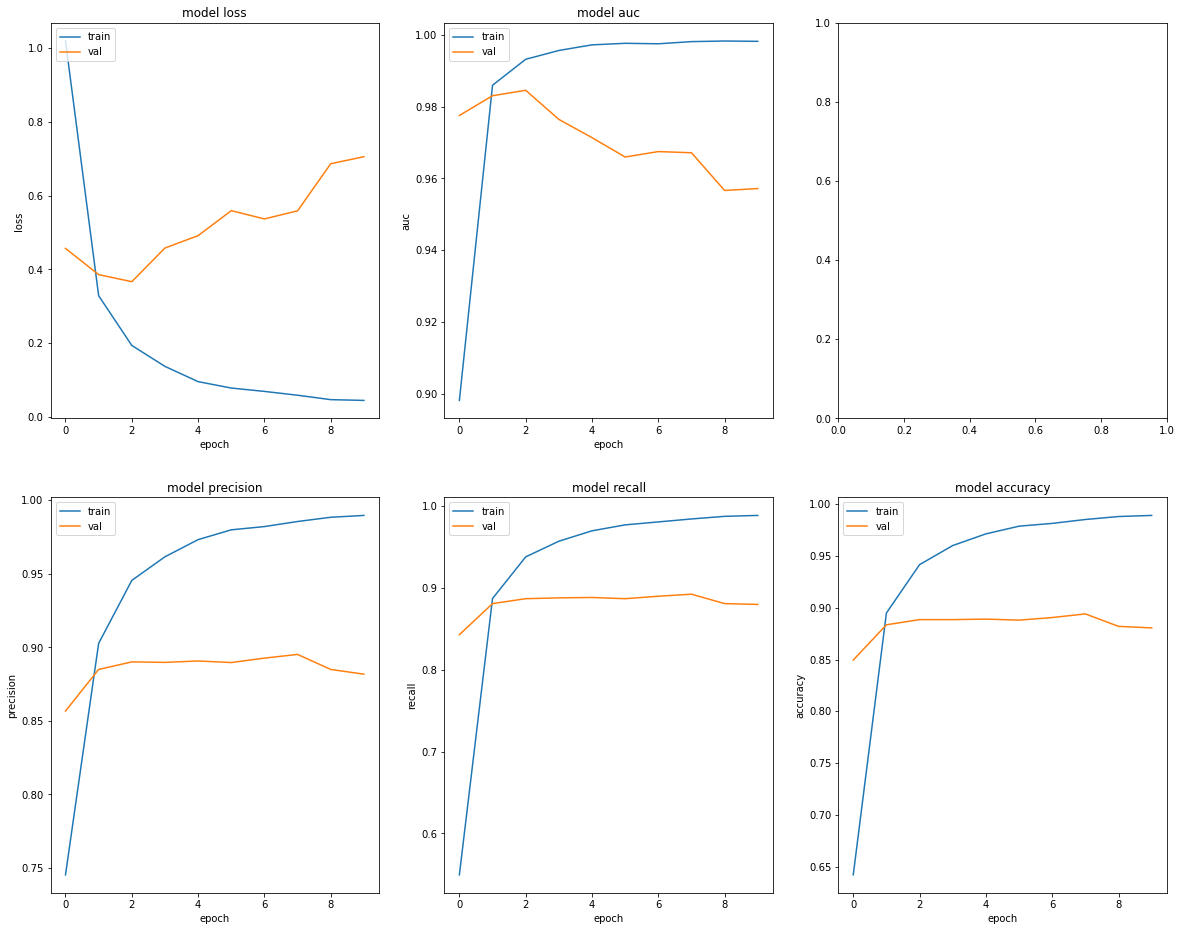

In [23]:
import matplotlib.pyplot as plt
# plot train loss vs val loss, train auc vs val auc, train recall vs val recall, train precision vs val precision and train accuracy vs val accuracy and comment your observations
fig, a = plt.subplots(2, 3,figsize=(20,16))

a[0,0].plot(history1.history['loss'])
a[0,0].plot(history1.history['val_loss'])
a[0,0].set_title('model loss')
a[0,0].set_ylabel('loss')
a[0,0].set_xlabel('epoch')
a[0,0].legend(['train', 'val'], loc='upper left')

a[0,1].plot(history1.history['auc'])
a[0,1].plot(history1.history['val_auc'])
a[0,1].set_title('model auc')
a[0,1].set_ylabel('auc')
a[0,1].set_xlabel('epoch')
a[0,1].legend(['train', 'val'], loc='upper left')

a[1,0].plot(history1.history['precision'])
a[1,0].plot(history1.history['val_precision'])
a[1,0].set_title('model precision')
a[1,0].set_ylabel('precision')
a[1,0].set_xlabel('epoch')
a[1,0].legend(['train', 'val'], loc='upper left')

a[1,1].plot(history1.history['recall'])
a[1,1].plot(history1.history['val_recall'])
a[1,1].set_title('model recall')
a[1,1].set_ylabel('recall')
a[1,1].set_xlabel('epoch')
a[1,1].legend(['train', 'val'], loc='upper left')

a[1,2].plot(history1.history['accuracy'])
a[1,2].plot(history1.history['val_accuracy'])
a[1,2].set_title('model accuracy')
a[1,2].set_ylabel('accuracy')
a[1,2].set_xlabel('epoch')
a[1,2].legend(['train', 'val'], loc='upper left')

plt.show()

In [24]:
# again call the build_model function and initialize the model
model1 = build_model(train_tfidf.toarray())

KerasTensor(type_spec=TensorSpec(shape=(None, 6), dtype=tf.float32, name=None), name='dense_11/Softmax:0', description="created by layer 'dense_11'") KerasTensor(type_spec=TensorSpec(shape=(None, 13457), dtype=tf.float32, name='input_2'), name='input_2', description="created by layer 'input_2'")


In [25]:
model1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 13457)]           0         
_________________________________________________________________
dense_6 (Dense)              (None, 2048)              27561984  
_________________________________________________________________
dropout_5 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dropout_6 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0   

In [26]:
# train and validate the model on the tfidf vectors of text which we have created initially for 10 epochs, 
# adjust batch size according to your computation power (suggestion use : 8)
history = model1.fit(train_tfidf.toarray(),TTT.toarray(), epochs=10,
                    validation_data=(validation_tfidf.toarray(),VVV.toarray()))

Epoch 1/10
500/500 [==============================] - 102s 202ms/step - loss: 1.2641 - auc: 0.8226 - precision: 0.6508 - recall: 0.3334 - accuracy: 0.5071 - val_loss: 0.3452 - val_auc: 0.9866 - val_precision: 0.8823 - val_recall: 0.8620 - val_accuracy: 0.8690
Epoch 2/10
500/500 [==============================] - 100s 201ms/step - loss: 0.3028 - auc: 0.9880 - precision: 0.9112 - recall: 0.8928 - accuracy: 0.9020 - val_loss: 0.3797 - val_auc: 0.9834 - val_precision: 0.8881 - val_recall: 0.8850 - val_accuracy: 0.8860
Epoch 3/10
500/500 [==============================] - 100s 200ms/step - loss: 0.1776 - auc: 0.9942 - precision: 0.9482 - recall: 0.9424 - accuracy: 0.9454 - val_loss: 0.4223 - val_auc: 0.9815 - val_precision: 0.8849 - val_recall: 0.8800 - val_accuracy: 0.8805
Epoch 4/10
500/500 [==============================] - 100s 200ms/step - loss: 0.1282 - auc: 0.9961 - precision: 0.9648 - recall: 0.9622 - accuracy: 0.9640 - val_loss: 0.4329 - val_auc: 0.9771 - val_precision: 0.8884 - va

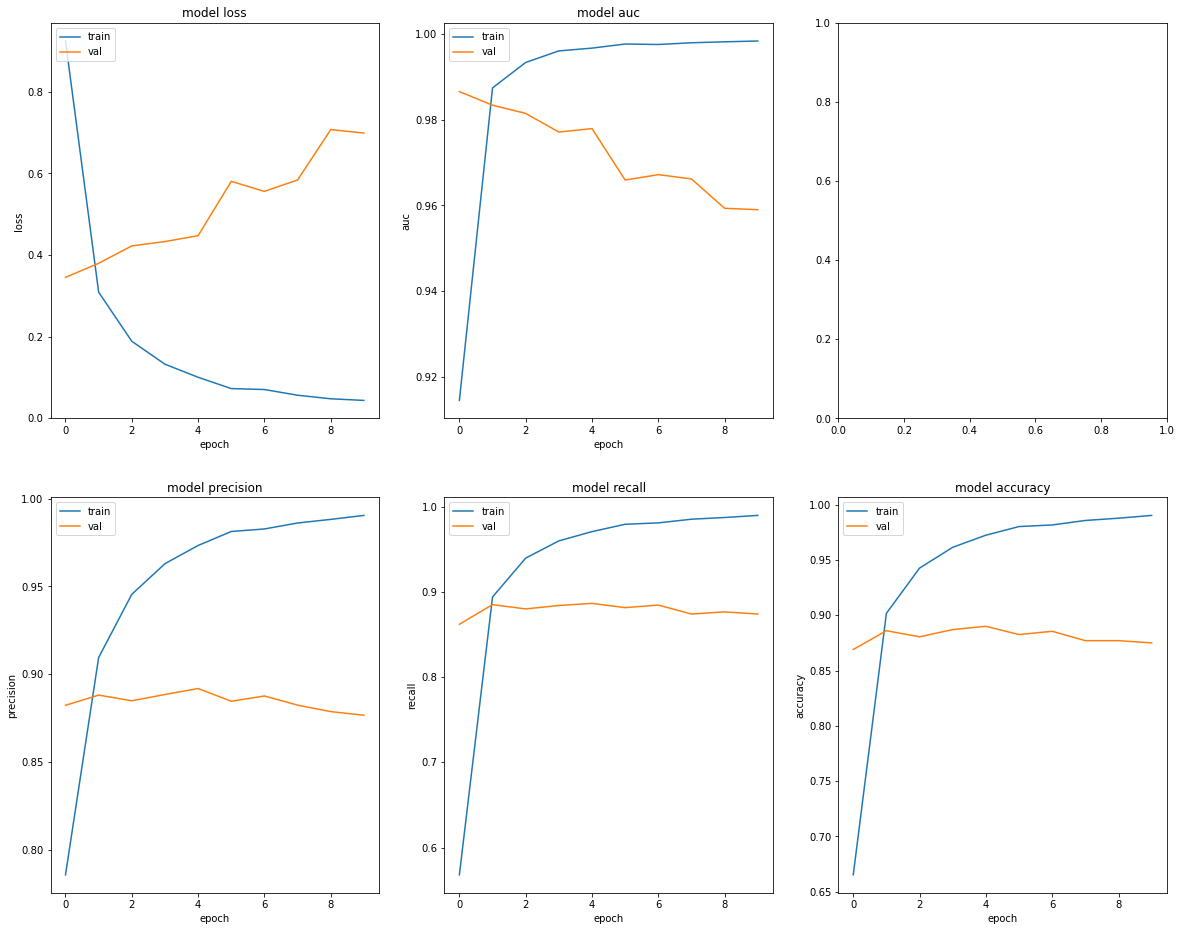

In [27]:
# plot train loss vs val loss, train auc vs val auc, train recall vs val recall, train precision vs val precision and train accuracy vs val accuracy and comment your observations
from matplotlib import pyplot as plt
#fig,ax = plt.subplots(figsize=(10,8))
fig, axs = plt.subplots(2, 3,figsize=(20,16))

axs[0,0].plot(history.history['loss'])
axs[0,0].plot(history.history['val_loss'])
axs[0,0].set_title('model loss')
axs[0,0].set_ylabel('loss')
axs[0,0].set_xlabel('epoch')
axs[0,0].legend(['train', 'val'], loc='upper left')

axs[0,1].plot(history.history['auc'])
axs[0,1].plot(history.history['val_auc'])
axs[0,1].set_title('model auc')
axs[0,1].set_ylabel('auc')
axs[0,1].set_xlabel('epoch')
axs[0,1].legend(['train', 'val'], loc='upper left')

axs[1,0].plot(history.history['precision'])
axs[1,0].plot(history.history['val_precision'])
axs[1,0].set_title('model precision')
axs[1,0].set_ylabel('precision')
axs[1,0].set_xlabel('epoch')
axs[1,0].legend(['train', 'val'], loc='upper left')

axs[1,1].plot(history.history['recall'])
axs[1,1].plot(history.history['val_recall'])
axs[1,1].set_title('model recall')
axs[1,1].set_ylabel('recall')
axs[1,1].set_xlabel('epoch')
axs[1,1].legend(['train', 'val'], loc='upper left')

axs[1,2].plot(history.history['accuracy'])
axs[1,2].plot(history.history['val_accuracy'])
axs[1,2].set_title('model accuracy')
axs[1,2].set_ylabel('accuracy')
axs[1,2].set_xlabel('epoch')
axs[1,2].legend(['train', 'val'], loc='upper left')

plt.show()

# We get  good results from every metrics. When we use countvectorize, we fianlly get loss: 0.0369 - auc: 0.9986 - precision: 0.9903 - recall: 0.9898 - accuracy: 0.9900 - val_loss: 0.7056 - val_auc: 0.9572 - val_precision: 0.8818 - val_recall: 0.8800 - val_accuracy: 0.8805. And when we use tfidf, we finally get 180ms/step - loss: 0.0382 - auc: 0.9986 - precision: 0.9912 - recall: 0.9906 - accuracy: 0.9911 - val_loss: 0.6990 - val_auc: 0.9590 - val_precision: 0.8766 - val_recall: 0.8740 - val_accuracy: 0.8750. Compare these two inputs, I think there are not big different. And countvectorize get better result in validation set and tfidf get better result in train set.  We can see that as the epoch increase our training set is getting better in each metric, but the corresponding metrics in the validation set are decreasing a lot(acu) or  decreasing a little(precision, recall, accuracy).In addition, the loss of validation set become larger. This indicates that my model is overfitting. I think I should add more the dropout layer

## Question 4 Theory Question  

What is the difference between Count Vectorizer, TFIDF, Word2Vec and Glove? (5 points)

**Answer:** To Count Vectorizer, it only count the number of times a word appears in the document. To TFIDF,it not only focuses on the frequency of words present in the corpus but also provides the importance of the words and give weight. Compare to Count Vectorizer and TFIDF, Word2Vec and Glove are both unsupervised models for generating word vectors. To Word2Vec, it can be seen as a model that improves its ability to predict (target word | context words), and GloVe is modeled to do dimensionality reduction. This reduction is on the co-occurrence counts matrix [minimizing a loss - the reconstruction loss]. Reconstruction loss tries to find the lower-dimensional representations.

What is the significant difference between the Niave Bayes Implementation using Bag of Words and TF-IDF? (5 points)

**Answer:**Bag of Words just creates a set of vectors containing the count of word occurrences in the document (reviews), while the TF-IDF model contains information on the more important words and the less important ones as well. Thus, when we use the Niave Bayes, TF-IDF can make some important words whose the count of the occurrences in the document is low have more probability than the probability of these words from Bag of Words. 